# Median-normalization of the count files ([DESeq2 method](https://scienceparkstudygroup.github.io/research-data-management-lesson/median_of_ratios_manual_normalization/index.html))

In [2]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'
from IPython.display import display
import pandas as pd
import numpy as np

In [3]:
# Loading the count files
drop_col = ['Chr', 'Start', 'End', 'Strand', 'Length']

RNA_count = pd.read_csv(f'{Project}/Results/Tables/featureCounts/v20220511/RNA', sep='\t', skiprows=1).drop(columns=drop_col)
RNA_count = RNA_count.rename(columns={'Geneid' : 'gene_id',
                                      'gene_name' : 'gene_name',
                                      'alignments/RNA/D0a.sorted.bam' : 'R0a',
                                      'alignments/RNA/D0b.sorted.bam' : 'R0b',
                                      'alignments/RNA/D0c.sorted.bam' : 'R0c',
                                      'alignments/RNA/D4a.sorted.bam' : 'R4a',
                                      'alignments/RNA/D4b.sorted.bam' : 'R4b',
                                      'alignments/RNA/D4c.sorted.bam' : 'R4c',
                                      'alignments/RNA/D8a.sorted.bam' : 'R8a',
                                      'alignments/RNA/D8b.sorted.bam' : 'R8b',
                                      'alignments/RNA/D8c.sorted.bam' : 'R8c'})
RNA_count['gene_id'] = RNA_count['gene_id'].str.split('.').str[0]

RPF_count = pd.read_csv(f'{Project}/Results/Tables/featureCounts/v20220511/novaseq', sep='\t', skiprows=1).drop(columns=drop_col)
RPF_count = RPF_count.rename(columns={'Geneid' : 'gene_id',
                                      'gene_name' : 'gene_name',
                                      'alignments/novaseq/D0a.sorted.bam' : 'P0a',
                                      'alignments/novaseq/D0b.sorted.bam' : 'P0b',
                                      'alignments/novaseq/D0c.sorted.bam' : 'P0c',
                                      'alignments/novaseq/D4a.sorted.bam' : 'P4a',
                                      'alignments/novaseq/D4b.sorted.bam' : 'P4b',
                                      'alignments/novaseq/D4c.sorted.bam' : 'P4c',
                                      'alignments/novaseq/D8a.sorted.bam' : 'P8a',
                                      'alignments/novaseq/D8b.sorted.bam' : 'P8b',
                                      'alignments/novaseq/D8c.sorted.bam' : 'P8c'})
RPF_count['gene_id'] = RPF_count['gene_id'].str.split('.').str[0]

display(RNA_count)
display(RPF_count)

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000102693,4933401J01Rik,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,Gm26206,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,Xkr4,19,13,22,1,3,3,4,1,14
3,ENSMUSG00000102851,Gm18956,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,Gm37180,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,11588,8852,9691,25254,13862,27097,45146,33680,28571
55355,ENSMUSG00000064369,mt-Te,42,32,38,13,44,34,21,10,9
55356,ENSMUSG00000064370,mt-Cytb,89911,62373,75649,213709,139924,168128,220600,138385,158429
55357,ENSMUSG00000064371,mt-Tt,0,2,0,3,4,8,4,8,6


,gene_id,gene_name,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000102693,4933401J01Rik,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,Gm26206,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,Xkr4,22,27,71,5,14,9,7,11,32
3,ENSMUSG00000102851,Gm18956,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,Gm37180,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,4452,3280,4254,8500,5627,8975,14540,17507,11194
55355,ENSMUSG00000064369,mt-Te,0,0,0,4,1,3,1,3,0
55356,ENSMUSG00000064370,mt-Cytb,9565,7081,9571,11854,15137,16471,9784,10164,10194
55357,ENSMUSG00000064371,mt-Tt,13,9,19,159,93,150,168,156,171


In [4]:
RNA_count_tmp = RNA_count.copy()
RNA_count_tmp.iloc[:,2:] = np.log(RNA_count_tmp.iloc[:,2:])
RNA_count_tmp = RNA_count_tmp.replace(-np.inf, np.nan).dropna()
RNA_count_tmp['pseudo_reference'] = RNA_count_tmp.iloc[:,2:].mean(axis=1)
for SP in RNA_count_tmp.iloc[:,2:11]:
    RNA_count_tmp[SP] = RNA_count_tmp[SP] - RNA_count_tmp['pseudo_reference']
RNA_count_tmp = RNA_count_tmp.drop(columns='pseudo_reference')
RNA_scaling_factor = [np.exp(i) for i in RNA_count_tmp.iloc[:,2:].median().tolist()]

RPF_count_tmp = RPF_count.copy()
RPF_count_tmp.iloc[:,2:] = np.log(RPF_count_tmp.iloc[:,2:])
RPF_count_tmp = RPF_count_tmp.replace(-np.inf, np.nan).dropna()
RPF_count_tmp['pseudo_reference'] = RPF_count_tmp.iloc[:,2:].mean(axis=1)
for SP in RPF_count_tmp.iloc[:,2:11]:
    RPF_count_tmp[SP] = RPF_count_tmp[SP] - RPF_count_tmp['pseudo_reference']
RPF_count_tmp = RPF_count_tmp.drop(columns='pseudo_reference')
RPF_scaling_factor = [np.exp(i) for i in RPF_count_tmp.iloc[:,2:].median().tolist()]

display(RNA_scaling_factor)
display(RPF_scaling_factor)

/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


[1.3032500678861434,
 1.0624931848708685,
 1.1740522996094067,
 0.8331373320236389,
 0.9876650957918904,
 0.8737337530268702,
 1.027256135759524,
 0.9361181310481972,
 1.0042244177017763]

[0.9452031776160377,
 0.9399681085435316,
 1.0581654422636575,
 0.9889427949718086,
 1.0589593525762038,
 1.0199698548271925,
 1.0253166434211387,
 1.072453745519261,
 1.0337522930922034]

In [5]:
RNA_Ncount = RNA_count.copy()
for SP, SF in zip(RNA_Ncount.iloc[:,2:], RNA_scaling_factor):
    RNA_Ncount[SP] = RNA_Ncount[SP] / SF

RPF_Ncount = RPF_count.copy()
for SP, SF in zip(RPF_Ncount.iloc[:,2:], RPF_scaling_factor):
    RPF_Ncount[SP] = RPF_Ncount[SP] / SF

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000102693,4933401J01Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUSG00000064842,Gm26206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000051951,Xkr4,14.578937,12.235373,18.738518,1.200282,3.037467,3.433540,3.893868,1.068241,13.941107
3,ENSMUSG00000102851,Gm18956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000103377,Gm37180,1.534625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,8891.616648,8331.347557,8254.317123,30311.929413,14035.121884,31012.879960,43948.143436,35978.365212,28450.811887
55355,ENSMUSG00000064369,mt-Te,32.227123,30.117840,32.366531,15.603670,44.549514,38.913456,20.442808,10.682412,8.962140
55356,ENSMUSG00000064370,mt-Cytb,68989.829516,58704.376544,64434.097208,256511.131821,141671.504436,192424.751153,214746.831214,147828.565018,157762.545112
55357,ENSMUSG00000064371,mt-Tt,0.000000,1.882365,0.000000,3.600847,4.049956,9.156107,3.893868,8.545930,5.974760


,gene_id,gene_name,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000102693,4933401J01Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUSG00000064842,Gm26206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000051951,Xkr4,23.275419,28.724379,67.097258,5.055904,13.220526,8.823790,6.827159,10.256853,30.955191
3,ENSMUSG00000102851,Gm18956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000103377,Gm37180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,4710.098427,3489.480090,4020.165307,8595.037087,5313.707260,8799.279663,14180.985058,16324.247151,10828.512860
55355,ENSMUSG00000064369,mt-Te,0.000000,0.000000,0.000000,4.044723,0.944323,2.941263,0.975308,2.797323,0.000000
55356,ENSMUSG00000064370,mt-Cytb,10119.517397,7533.234304,9044.899425,11986.537604,14294.221929,16148.516470,9542.418006,9477.331813,9861.163132
55357,ENSMUSG00000064371,mt-Tt,13.753657,9.574793,17.955604,160.777753,87.822068,147.063170,163.851822,145.460819,165.416804


# Cut off the genes

In [6]:
# Cut the genes with low expression
cut = 20

slct = (((RNA_Ncount[['R0a','R0b','R0c']] > cut).T.sum() == 3) | 
        ((RNA_Ncount[['R4a','R4b','R4c']] > cut).T.sum() == 3) | 
        ((RNA_Ncount[['R8a','R8b','R8c']] > cut).T.sum() == 3))
RNA_Ncount = RNA_Ncount[slct].reset_index(drop=True)

slct = (((RPF_Ncount[['P0a','P0b','P0c']] > cut).T.sum() == 3) | 
        ((RPF_Ncount[['P4a','P4b','P4c']] > cut).T.sum() == 3) | 
        ((RPF_Ncount[['P8a','P8b','P8c']] > cut).T.sum() == 3))
RPF_Ncount = RPF_Ncount[slct].reset_index(drop=True)

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,Mrpl15,1042.777617,1210.360705,1086.834037,5242.833123,2861.293785,4964.899187,5602.302872,7074.961781,5074.562927
1,ENSMUSG00000025903,Lypla1,1210.051731,1131.301374,1153.270600,2268.533563,1256.498792,1791.163492,2982.703041,1839.511428,1849.188256
2,ENSMUSG00000033813,Tcea1,2289.660345,2001.895194,1962.433872,1334.713927,1078.300736,1126.201199,3338.991981,2100.162292,1987.603532
3,ENSMUSG00000033793,Atp6v1h,2211.394475,2232.484908,2434.303822,2754.647898,2453.260736,2651.837579,2419.065619,2018.975958,2246.509804
4,ENSMUSG00000025907,Rb1cc1,368.309975,203.295422,282.781270,337.279329,155.923299,306.729595,426.378568,336.495993,292.763246
...,...,...,...,...,...,...,...,...,...,...,...
13176,ENSMUSG00000064367,mt-Nd5,20714.366847,16473.517430,18183.176343,46744.994496,30609.566065,63098.168989,69488.024958,56540.940982,48142.625441
13177,ENSMUSG00000064368,mt-Nd6,8891.616648,8331.347557,8254.317123,30311.929413,14035.121884,31012.879960,43948.143436,35978.365212,28450.811887
13178,ENSMUSG00000064369,mt-Te,32.227123,30.117840,32.366531,15.603670,44.549514,38.913456,20.442808,10.682412,8.962140
13179,ENSMUSG00000064370,mt-Cytb,68989.829516,58704.376544,64434.097208,256511.131821,141671.504436,192424.751153,214746.831214,147828.565018,157762.545112


,gene_id,gene_name,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000051951,Xkr4,23.275419,28.724379,67.097258,5.055904,13.220526,8.823790,6.827159,10.256853,30.955191
1,ENSMUSG00000033845,Mrpl15,1361.612012,1291.533180,1228.541349,4298.529724,2910.404439,4907.988188,5770.900178,5560.146556,4457.547549
2,ENSMUSG00000025903,Lypla1,46.550838,44.682367,57.646940,76.849743,68.935602,100.983377,83.876528,82.054821,73.518579
3,ENSMUSG00000033813,Tcea1,862.248477,915.988524,947.866902,499.523332,651.583083,567.663836,1413.221963,1077.901965,1130.831833
4,ENSMUSG00000033793,Atp6v1h,7206.916102,6600.223926,6693.660289,9381.735776,9226.983053,9613.029202,8356.442914,7677.720400,8177.007255
...,...,...,...,...,...,...,...,...,...,...,...
13148,ENSMUSG00000064367,mt-Nd5,5152.331388,4116.097094,4611.755218,7514.084776,8775.596511,9037.521998,9748.208092,10925.412913,8570.718594
13149,ENSMUSG00000064368,mt-Nd6,4710.098427,3489.480090,4020.165307,8595.037087,5313.707260,8799.279663,14180.985058,16324.247151,10828.512860
13150,ENSMUSG00000064370,mt-Cytb,10119.517397,7533.234304,9044.899425,11986.537604,14294.221929,16148.516470,9542.418006,9477.331813,9861.163132
13151,ENSMUSG00000064371,mt-Tt,13.753657,9.574793,17.955604,160.777753,87.822068,147.063170,163.851822,145.460819,165.416804


In [7]:
# Selecting protein coding genes
import gzip
import csv

gtf_file = gzip.open('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GTF/gencode.vM27.annotation.gtf.gz', 'rt')
raw_info = csv.reader(gtf_file, dialect='excel-tab')

protein_coding=[]
for line in raw_info:
    if line[0].startswith("#"):
        continue
    if line[2].startswith("gene") and 'protein_coding' in line[8]:
        gene_id = line[8].split(';')[0].split('"')[1].rstrip('"').split('.')[0]
        protein_coding.append(gene_id)

print(protein_coding[:5])
print(f'Number of protein-coding genes {len(protein_coding)}')

['ENSMUSG00000051951', 'ENSMUSG00000025900', 'ENSMUSG00000025902', 'ENSMUSG00000033845', 'ENSMUSG00000025903']
Number of protein-coding genes 21834


In [8]:
RNA_Ncount = RNA_Ncount[RNA_Ncount['gene_id'].isin(protein_coding)].reset_index(drop=True)
RPF_Ncount = RPF_Ncount[RPF_Ncount['gene_id'].isin(protein_coding)].reset_index(drop=True)

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,Mrpl15,1042.777617,1210.360705,1086.834037,5242.833123,2861.293785,4964.899187,5602.302872,7074.961781,5074.562927
1,ENSMUSG00000025903,Lypla1,1210.051731,1131.301374,1153.270600,2268.533563,1256.498792,1791.163492,2982.703041,1839.511428,1849.188256
2,ENSMUSG00000033813,Tcea1,2289.660345,2001.895194,1962.433872,1334.713927,1078.300736,1126.201199,3338.991981,2100.162292,1987.603532
3,ENSMUSG00000033793,Atp6v1h,2211.394475,2232.484908,2434.303822,2754.647898,2453.260736,2651.837579,2419.065619,2018.975958,2246.509804
4,ENSMUSG00000025907,Rb1cc1,368.309975,203.295422,282.781270,337.279329,155.923299,306.729595,426.378568,336.495993,292.763246
...,...,...,...,...,...,...,...,...,...,...,...
12206,ENSMUSG00000064360,mt-Nd3,23.019373,6.588278,5.110505,46.811010,23.287246,32.046376,155.754728,102.551160,35.848561
12207,ENSMUSG00000064363,mt-Nd4,17704.200114,13505.968983,14268.529609,78722.915754,29803.624858,47603.746400,106295.787583,57461.764937,56075.115290
12208,ENSMUSG00000064367,mt-Nd5,20714.366847,16473.517430,18183.176343,46744.994496,30609.566065,63098.168989,69488.024958,56540.940982,48142.625441
12209,ENSMUSG00000064368,mt-Nd6,8891.616648,8331.347557,8254.317123,30311.929413,14035.121884,31012.879960,43948.143436,35978.365212,28450.811887


,gene_id,gene_name,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000051951,Xkr4,23.275419,28.724379,67.097258,5.055904,13.220526,8.823790,6.827159,10.256853,30.955191
1,ENSMUSG00000033845,Mrpl15,1361.612012,1291.533180,1228.541349,4298.529724,2910.404439,4907.988188,5770.900178,5560.146556,4457.547549
2,ENSMUSG00000025903,Lypla1,46.550838,44.682367,57.646940,76.849743,68.935602,100.983377,83.876528,82.054821,73.518579
3,ENSMUSG00000033813,Tcea1,862.248477,915.988524,947.866902,499.523332,651.583083,567.663836,1413.221963,1077.901965,1130.831833
4,ENSMUSG00000033793,Atp6v1h,7206.916102,6600.223926,6693.660289,9381.735776,9226.983053,9613.029202,8356.442914,7677.720400,8177.007255
...,...,...,...,...,...,...,...,...,...,...,...
12324,ENSMUSG00000065947,mt-Nd4l,24.333393,20.213452,12.285413,23.257159,27.385376,27.451792,49.740732,56.878910,32.889891
12325,ENSMUSG00000064363,mt-Nd4,1608.119858,1264.936533,1630.179867,1997.082147,2460.906543,2634.391583,2843.024171,2859.796996,2648.603556
12326,ENSMUSG00000064367,mt-Nd5,5152.331388,4116.097094,4611.755218,7514.084776,8775.596511,9037.521998,9748.208092,10925.412913,8570.718594
12327,ENSMUSG00000064368,mt-Nd6,4710.098427,3489.480090,4020.165307,8595.037087,5313.707260,8799.279663,14180.985058,16324.247151,10828.512860


In [9]:
# Add 1 pseudocount
RNA_Ncount.iloc[:,2:] += 1
RPF_Ncount.iloc[:,2:] += 1

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,Mrpl15,1043.777617,1211.360705,1087.834037,5243.833123,2862.293785,4965.899187,5603.302872,7075.961781,5075.562927
1,ENSMUSG00000025903,Lypla1,1211.051731,1132.301374,1154.270600,2269.533563,1257.498792,1792.163492,2983.703041,1840.511428,1850.188256
2,ENSMUSG00000033813,Tcea1,2290.660345,2002.895194,1963.433872,1335.713927,1079.300736,1127.201199,3339.991981,2101.162292,1988.603532
3,ENSMUSG00000033793,Atp6v1h,2212.394475,2233.484908,2435.303822,2755.647898,2454.260736,2652.837579,2420.065619,2019.975958,2247.509804
4,ENSMUSG00000025907,Rb1cc1,369.309975,204.295422,283.781270,338.279329,156.923299,307.729595,427.378568,337.495993,293.763246
...,...,...,...,...,...,...,...,...,...,...,...
12206,ENSMUSG00000064360,mt-Nd3,24.019373,7.588278,6.110505,47.811010,24.287246,33.046376,156.754728,103.551160,36.848561
12207,ENSMUSG00000064363,mt-Nd4,17705.200114,13506.968983,14269.529609,78723.915754,29804.624858,47604.746400,106296.787583,57462.764937,56076.115290
12208,ENSMUSG00000064367,mt-Nd5,20715.366847,16474.517430,18184.176343,46745.994496,30610.566065,63099.168989,69489.024958,56541.940982,48143.625441
12209,ENSMUSG00000064368,mt-Nd6,8892.616648,8332.347557,8255.317123,30312.929413,14036.121884,31013.879960,43949.143436,35979.365212,28451.811887


,gene_id,gene_name,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000051951,Xkr4,24.275419,29.724379,68.097258,6.055904,14.220526,9.823790,7.827159,11.256853,31.955191
1,ENSMUSG00000033845,Mrpl15,1362.612012,1292.533180,1229.541349,4299.529724,2911.404439,4908.988188,5771.900178,5561.146556,4458.547549
2,ENSMUSG00000025903,Lypla1,47.550838,45.682367,58.646940,77.849743,69.935602,101.983377,84.876528,83.054821,74.518579
3,ENSMUSG00000033813,Tcea1,863.248477,916.988524,948.866902,500.523332,652.583083,568.663836,1414.221963,1078.901965,1131.831833
4,ENSMUSG00000033793,Atp6v1h,7207.916102,6601.223926,6694.660289,9382.735776,9227.983053,9614.029202,8357.442914,7678.720400,8178.007255
...,...,...,...,...,...,...,...,...,...,...,...
12324,ENSMUSG00000065947,mt-Nd4l,25.333393,21.213452,13.285413,24.257159,28.385376,28.451792,50.740732,57.878910,33.889891
12325,ENSMUSG00000064363,mt-Nd4,1609.119858,1265.936533,1631.179867,1998.082147,2461.906543,2635.391583,2844.024171,2860.796996,2649.603556
12326,ENSMUSG00000064367,mt-Nd5,5153.331388,4117.097094,4612.755218,7515.084776,8776.596511,9038.521998,9749.208092,10926.412913,8571.718594
12327,ENSMUSG00000064368,mt-Nd6,4711.098427,3490.480090,4021.165307,8596.037087,5314.707260,8800.279663,14181.985058,16325.247151,10829.512860


# FC calculation

In [10]:
# FC
Conds = ['4','8']
reps = ['a','b','c']

RNA_FC = pd.DataFrame()
RNA_FC['gene_id'] = RNA_Ncount['gene_id']
RNA_FC['gene_name'] = RNA_Ncount['gene_name']
for Cond in Conds:
    for rep in reps:
        RNA_FC['R'+Cond+rep] = RNA_Ncount['R'+Cond+rep] / RNA_Ncount['R0'+rep]
   
RPF_FC = pd.DataFrame()
RPF_FC['gene_id'] = RPF_Ncount['gene_id']
RPF_FC['gene_name'] = RPF_Ncount['gene_name']
for Cond in Conds:
    for rep in reps:
        RPF_FC['P'+Cond+rep] = RPF_Ncount['P'+Cond+rep] / RPF_Ncount['P0'+rep]

display(RNA_FC)
display(RPF_FC)

,gene_id,gene_name,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,Mrpl15,5.023899,2.362875,4.564942,5.368292,5.841333,4.665751
1,ENSMUSG00000025903,Lypla1,1.874019,1.110569,1.552637,2.463729,1.625461,1.602907
2,ENSMUSG00000033813,Tcea1,0.583113,0.538870,0.574097,1.458091,1.049063,1.012819
3,ENSMUSG00000033793,Atp6v1h,1.245550,1.098848,1.089325,1.093867,0.904405,0.922887
4,ENSMUSG00000025907,Rb1cc1,0.915977,0.768120,1.084390,1.157235,1.652000,1.035175
...,...,...,...,...,...,...,...,...
12206,ENSMUSG00000064360,mt-Nd3,1.990519,3.200627,5.408125,6.526179,13.646201,6.030363
12207,ENSMUSG00000064363,mt-Nd4,4.446373,2.206611,3.336112,6.003704,4.254305,3.929780
12208,ENSMUSG00000064367,mt-Nd5,2.256585,1.858055,3.470004,3.354468,3.432085,2.647556
12209,ENSMUSG00000064368,mt-Nd6,3.408775,1.684534,3.756837,4.942206,4.318035,3.446483


,gene_id,gene_name,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000051951,Xkr4,0.249467,0.478413,0.144261,0.322431,0.378708,0.469258
1,ENSMUSG00000033845,Mrpl15,3.155359,2.252479,3.992536,4.235909,4.302517,3.626188
2,ENSMUSG00000025903,Lypla1,1.637190,1.530910,1.738938,1.784964,1.818094,1.270630
3,ENSMUSG00000033813,Tcea1,0.579814,0.711659,0.599308,1.638256,1.176571,1.192825
4,ENSMUSG00000033793,Atp6v1h,1.301727,1.397920,1.436074,1.159481,1.163227,1.221572
...,...,...,...,...,...,...,...,...
12324,ENSMUSG00000065947,mt-Nd4l,0.957517,1.338084,2.141581,2.002919,2.728406,2.550910
12325,ENSMUSG00000064363,mt-Nd4,1.241724,1.944731,1.615635,1.767441,2.259827,1.624348
12326,ENSMUSG00000064367,mt-Nd5,1.458296,2.131744,1.959463,1.891826,2.653912,1.858264
12327,ENSMUSG00000064368,mt-Nd6,1.824635,1.522629,2.188490,3.010335,4.677078,2.693128


In [11]:
# logFC
RNA_logFC = RNA_FC.copy()
RNA_logFC.iloc[:,2:] = np.log2(RNA_FC.iloc[:,2:])
   
RPF_logFC = RPF_FC.copy()
RPF_logFC.iloc[:,2:] = np.log2(RPF_FC.iloc[:,2:])

display(RNA_logFC)
display(RPF_logFC)

,gene_id,gene_name,R4a,R4b,R4c,R8a,R8b,R8c
0,ENSMUSG00000033845,Mrpl15,2.328807,1.240543,2.190597,2.424463,2.546298,2.222109
1,ENSMUSG00000025903,Lypla1,0.906135,0.151299,0.634721,1.300843,0.700849,0.680691
2,ENSMUSG00000033813,Tcea1,-0.778152,-0.891990,-0.800634,0.544081,0.069101,0.018377
3,ENSMUSG00000033793,Atp6v1h,0.316783,0.135992,0.123435,0.129438,-0.144958,-0.115774
4,ENSMUSG00000025907,Rb1cc1,-0.126617,-0.380597,0.116884,0.210682,0.724214,0.049875
...,...,...,...,...,...,...,...,...
12206,ENSMUSG00000064360,mt-Nd3,0.993144,1.678355,2.435129,2.706239,3.770427,2.592245
12207,ENSMUSG00000064363,mt-Nd4,2.152629,1.141832,1.738168,2.585853,2.088923,1.974449
12208,ENSMUSG00000064367,mt-Nd5,1.174141,0.893794,1.794937,1.746084,1.779085,1.404661
12209,ENSMUSG00000064368,mt-Nd6,1.769253,0.752349,1.909518,2.305155,2.110375,1.785125


,gene_id,gene_name,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000051951,Xkr4,-2.003082,-1.063672,-2.793245,-1.632935,-1.400843,-1.091546
1,ENSMUSG00000033845,Mrpl15,1.657804,1.171514,1.997305,2.082672,2.105181,1.858454
2,ENSMUSG00000025903,Lypla1,0.711222,0.614390,0.798206,0.835895,0.862427,0.345544
3,ENSMUSG00000033813,Tcea1,-0.786339,-0.490742,-0.738630,0.712161,0.234588,0.254382
4,ENSMUSG00000033793,Atp6v1h,0.380426,0.483282,0.522130,0.213479,0.218132,0.288738
...,...,...,...,...,...,...,...,...
12324,ENSMUSG00000065947,mt-Nd4l,-0.062630,0.420168,1.098676,1.002104,1.448058,1.351012
12325,ENSMUSG00000064363,mt-Nd4,0.312344,0.959571,0.692101,0.821662,1.176212,0.699861
12326,ENSMUSG00000064367,mt-Nd5,0.544284,1.092034,0.970458,0.919780,1.408120,0.893956
12327,ENSMUSG00000064368,mt-Nd6,0.867608,0.606565,1.129936,1.589924,2.225607,1.429283


In [12]:
# avg logFC
Conds = ['4','8']
reps = ['a','b','c']

RNA_avg_logFC = pd.DataFrame()
RNA_avg_logFC['gene_id'] = RNA_logFC['gene_id']
RNA_avg_logFC['gene_name'] = RNA_logFC['gene_name']
for Cond in Conds:
    RNA_avg_logFC['R'+Cond] = RNA_logFC[['R'+Cond+rep for rep in reps]].mean(axis=1)
   
RPF_avg_logFC = pd.DataFrame()
RPF_avg_logFC['gene_id'] = RPF_logFC['gene_id']
RPF_avg_logFC['gene_name'] = RPF_logFC['gene_name']
for Cond in Conds:
    RPF_avg_logFC['P'+Cond] = RPF_logFC[['P'+Cond+rep for rep in reps]].mean(axis=1)

display(RNA_avg_logFC)
display(RPF_avg_logFC)

,gene_id,gene_name,R4,R8
0,ENSMUSG00000033845,Mrpl15,1.919982,2.397623
1,ENSMUSG00000025903,Lypla1,0.564052,0.894128
2,ENSMUSG00000033813,Tcea1,-0.823592,0.210519
3,ENSMUSG00000033793,Atp6v1h,0.192070,-0.043765
4,ENSMUSG00000025907,Rb1cc1,-0.130110,0.328257
...,...,...,...,...
12206,ENSMUSG00000064360,mt-Nd3,1.702209,3.022970
12207,ENSMUSG00000064363,mt-Nd4,1.677543,2.216408
12208,ENSMUSG00000064367,mt-Nd5,1.287624,1.643277
12209,ENSMUSG00000064368,mt-Nd6,1.477040,2.066885


,gene_id,gene_name,P4,P8
0,ENSMUSG00000051951,Xkr4,-1.953333,-1.375108
1,ENSMUSG00000033845,Mrpl15,1.608874,2.015435
2,ENSMUSG00000025903,Lypla1,0.707939,0.681289
3,ENSMUSG00000033813,Tcea1,-0.671903,0.400377
4,ENSMUSG00000033793,Atp6v1h,0.461946,0.240117
...,...,...,...,...
12324,ENSMUSG00000065947,mt-Nd4l,0.485405,1.267058
12325,ENSMUSG00000064363,mt-Nd4,0.654672,0.899245
12326,ENSMUSG00000064367,mt-Nd5,0.868925,1.073952
12327,ENSMUSG00000064368,mt-Nd6,0.868036,1.748271


# RD & FC calculation

In [13]:
SPs = ['0','4','8']
reps = ['a','b','c']

R_name = ['R'+spl+rep  for spl in SPs for rep in reps]
P_name = ['P'+spl+rep  for spl in SPs for rep in reps]
RD_name= ['RD'+spl+rep for spl in SPs for rep in reps]

In [14]:
merge_data = pd.merge(RNA_Ncount, RPF_Ncount.drop(columns='gene_name'), on='gene_id')
merge_data

,gene_id,gene_name,R0a,R0b,R0c,R4a,R4b,R4c,R8a,R8b,R8c,P0a,P0b,P0c,P4a,P4b,P4c,P8a,P8b,P8c
0,ENSMUSG00000033845,Mrpl15,1043.777617,1211.360705,1087.834037,5243.833123,2862.293785,4965.899187,5603.302872,7075.961781,5075.562927,1362.612012,1292.533180,1229.541349,4299.529724,2911.404439,4908.988188,5771.900178,5561.146556,4458.547549
1,ENSMUSG00000025903,Lypla1,1211.051731,1132.301374,1154.270600,2269.533563,1257.498792,1792.163492,2983.703041,1840.511428,1850.188256,47.550838,45.682367,58.646940,77.849743,69.935602,101.983377,84.876528,83.054821,74.518579
2,ENSMUSG00000033813,Tcea1,2290.660345,2002.895194,1963.433872,1335.713927,1079.300736,1127.201199,3339.991981,2101.162292,1988.603532,863.248477,916.988524,948.866902,500.523332,652.583083,568.663836,1414.221963,1078.901965,1131.831833
3,ENSMUSG00000033793,Atp6v1h,2212.394475,2233.484908,2435.303822,2755.647898,2454.260736,2652.837579,2420.065619,2019.975958,2247.509804,7207.916102,6601.223926,6694.660289,9382.735776,9227.983053,9614.029202,8357.442914,7678.720400,8178.007255
4,ENSMUSG00000025907,Rb1cc1,369.309975,204.295422,283.781270,338.279329,156.923299,307.729595,427.378568,337.495993,293.763246,1890.540833,1992.556929,2215.209524,1942.467201,1940.640077,2031.452165,1858.962623,2136.290225,2110.789758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,24.019373,7.588278,6.110505,47.811010,24.287246,33.046376,156.754728,103.551160,36.848561,10.521762,6.319329,18.010573,21.223617,42.550226,28.451792,17.580244,14.054176,17.444945
11806,ENSMUSG00000064363,mt-Nd4,17705.200114,13506.968983,14269.529609,78723.915754,29804.624858,47604.746400,106296.787583,57462.764937,56076.115290,1609.119858,1265.936533,1631.179867,1998.082147,2461.906543,2635.391583,2844.024171,2860.796996,2649.603556
11807,ENSMUSG00000064367,mt-Nd5,20715.366847,16474.517430,18184.176343,46745.994496,30610.566065,63099.168989,69489.024958,56541.940982,48143.625441,5153.331388,4117.097094,4612.755218,7515.084776,8776.596511,9038.521998,9749.208092,10926.412913,8571.718594
11808,ENSMUSG00000064368,mt-Nd6,8892.616648,8332.347557,8255.317123,30312.929413,14036.121884,31013.879960,43949.143436,35979.365212,28451.811887,4711.098427,3490.480090,4021.165307,8596.037087,5314.707260,8800.279663,14181.985058,16325.247151,10829.512860


In [15]:
# RD
RD = pd.DataFrame()
RD['gene_id'] = merge_data['gene_id']
RD['gene_name'] = merge_data['gene_name']

for T,R,P in zip(RD_name, R_name, P_name):
    RD[T] = merge_data[P] / merge_data[R]

RD

,gene_id,gene_name,RD0a,RD0b,RD0c,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,Mrpl15,1.305462,1.067009,1.130266,0.819921,1.017158,0.988540,1.030089,0.785921,0.878434
1,ENSMUSG00000025903,Lypla1,0.039264,0.040345,0.050809,0.034302,0.055615,0.056905,0.028447,0.045126,0.040276
2,ENSMUSG00000033813,Tcea1,0.376856,0.457832,0.483269,0.374723,0.604635,0.504492,0.423421,0.513479,0.569159
3,ENSMUSG00000033793,Atp6v1h,3.257971,2.955571,2.749004,3.404911,3.759985,3.624055,3.453395,3.801392,3.638697
4,ENSMUSG00000025907,Rb1cc1,5.119117,9.753312,7.806046,5.742199,12.366807,6.601420,4.349686,6.329824,7.185343
...,...,...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,0.438053,0.832775,2.947477,0.443906,1.751958,0.860966,0.112151,0.135722,0.473423
11806,ENSMUSG00000064363,mt-Nd4,0.090884,0.093725,0.114312,0.025381,0.082601,0.055360,0.026756,0.049785,0.047250
11807,ENSMUSG00000064367,mt-Nd5,0.248769,0.249907,0.253669,0.160764,0.286718,0.143243,0.140299,0.193244,0.178045
11808,ENSMUSG00000064368,mt-Nd6,0.529776,0.418907,0.487100,0.283577,0.378645,0.283753,0.322691,0.453739,0.380626


In [16]:
# log2_RD
log2_RD = RD.copy()
log2_RD.iloc[:,2:] = np.log2(RD.iloc[:,2:])

log2_RD

,gene_id,gene_name,RD0a,RD0b,RD0c,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,Mrpl15,0.384560,0.093573,0.176662,-0.286443,0.024544,-0.016629,0.042769,-0.347544,-0.186994
1,ENSMUSG00000025903,Lypla1,-4.670646,-4.631477,-4.298782,-4.865560,-4.168386,-4.135296,-5.135595,-4.469899,-4.633928
2,ENSMUSG00000033813,Tcea1,-1.407916,-1.127111,-1.049101,-1.416102,-0.725863,-0.987097,-1.239836,-0.961624,-0.813096
3,ENSMUSG00000033793,Atp6v1h,1.703974,1.563437,1.458909,1.767617,1.910727,1.857605,1.788015,1.926528,1.863422
4,ENSMUSG00000025907,Rb1cc1,2.355895,3.285892,2.964592,2.521603,3.628401,2.722776,2.120911,2.662165,2.845057
...,...,...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,-1.190822,-0.264001,1.559481,-1.171672,0.808968,-0.215973,-3.156482,-2.881273,-1.078799
11806,ENSMUSG00000064363,mt-Nd4,-3.459829,-3.415427,-3.128950,-5.300114,-3.597688,-4.175016,-5.224020,-4.328138,-4.403538
11807,ENSMUSG00000064367,mt-Nd5,-2.007124,-2.000537,-1.978983,-2.636981,-1.802296,-2.803462,-2.833428,-2.371502,-2.489688
11808,ENSMUSG00000064368,mt-Nd6,-0.916545,-1.255298,-1.037710,-1.818190,-1.401082,-1.817293,-1.631776,-1.140065,-1.393552


In [17]:
# RD FC
RD_FC = pd.DataFrame()
RD_FC['gene_id'] = RD['gene_id']
RD_FC['gene_name'] = RD['gene_name']

for spl in ['4','8']:
    for rep in reps:
        RD_FC['RD'+spl+rep] = RD['RD'+spl+rep] / RD['RD0'+rep]

RD_FC

,gene_id,gene_name,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,Mrpl15,0.628070,0.953279,0.874608,0.789061,0.736564,0.777193
1,ENSMUSG00000025903,Lypla1,0.873625,1.378492,1.119990,0.724497,1.118510,0.792704
2,ENSMUSG00000033813,Tcea1,0.994342,1.320650,1.043915,1.123562,1.121545,1.177727
3,ENSMUSG00000033793,Atp6v1h,1.045102,1.272169,1.318316,1.059984,1.286178,1.323642
4,ENSMUSG00000025907,Rb1cc1,1.121717,1.267960,0.845680,0.849695,0.648992,0.920484
...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,1.013362,2.103758,0.292103,0.256022,0.162976,0.160620
11806,ENSMUSG00000064363,mt-Nd4,0.279267,0.881321,0.484287,0.294392,0.531186,0.413343
11807,ENSMUSG00000064367,mt-Nd5,0.646240,1.147298,0.564686,0.563972,0.773265,0.701879
11808,ENSMUSG00000064368,mt-Nd6,0.535276,0.903888,0.582535,0.609108,1.083150,0.781413


In [18]:
# RD log2 FC
RD_log2_FC = RD_FC.copy()
RD_log2_FC.iloc[:,2:] = np.log2(RD_FC.iloc[:,2:])

RD_log2_FC

,gene_id,gene_name,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,Mrpl15,-0.671003,-0.069029,-0.193291,-0.341792,-0.441117,-0.363656
1,ENSMUSG00000025903,Lypla1,-0.194914,0.463091,0.163485,-0.464949,0.161578,-0.335146
2,ENSMUSG00000033813,Tcea1,-0.008186,0.401248,0.062004,0.168080,0.165488,0.236005
3,ENSMUSG00000033793,Atp6v1h,0.063644,0.347290,0.398696,0.084042,0.363091,0.404513
4,ENSMUSG00000025907,Rb1cc1,0.165708,0.342509,-0.241816,-0.234984,-0.623727,-0.119535
...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,0.019150,1.072969,-1.775453,-1.965660,-2.617272,-2.638280
11806,ENSMUSG00000064363,mt-Nd4,-1.840285,-0.182261,-1.046066,-1.764191,-0.912711,-1.274588
11807,ENSMUSG00000064367,mt-Nd5,-0.629857,0.198241,-0.824479,-0.826304,-0.370965,-0.510705
11808,ENSMUSG00000064368,mt-Nd6,-0.901645,-0.145785,-0.779583,-0.715231,0.115233,-0.355842


In [19]:
# RD avg log2FC
RD_avg_logFC = pd.DataFrame()
RD_avg_logFC['gene_id'] = RD_log2_FC['gene_id']
RD_avg_logFC['gene_name'] = RD_log2_FC['gene_name']

for spl in ['4','8']:
    RD_avg_logFC['D'+spl] = RD_log2_FC[['RD'+spl+rep for rep in reps]].mean(axis=1)

RD_avg_logFC

,gene_id,gene_name,D4,D8
0,ENSMUSG00000033845,Mrpl15,-0.311108,-0.382188
1,ENSMUSG00000025903,Lypla1,0.143887,-0.212839
2,ENSMUSG00000033813,Tcea1,0.151689,0.189858
3,ENSMUSG00000033793,Atp6v1h,0.269876,0.283882
4,ENSMUSG00000025907,Rb1cc1,0.088801,-0.326082
...,...,...,...,...
11805,ENSMUSG00000064360,mt-Nd3,-0.227778,-2.407071
11806,ENSMUSG00000064363,mt-Nd4,-1.022871,-1.317163
11807,ENSMUSG00000064367,mt-Nd5,-0.418699,-0.569325
11808,ENSMUSG00000064368,mt-Nd6,-0.609004,-0.318614


# Save the results

In [ ]:
RNA_Ncount.to_csv('adi_RNA_Ncount.tsv', sep='\t', index=False)
RPF_Ncount.to_csv('adi_RPF_Ncount.tsv', sep='\t', index=False)

RNA_FC.to_csv('adi_RNA_FC.tsv', sep='\t', index=False)
RPF_FC.to_csv('adi_RPF_FC.tsv', sep='\t', index=False)

RNA_logFC.to_csv('adi_RNA_log2FC.tsv', sep='\t', index=False)
RPF_logFC.to_csv('adi_RPF_log2FC.tsv', sep='\t', index=False)

RNA_avg_logFC.to_csv('adi_RNA_avg_log2FC.tsv', index=False, sep='\t')
RPF_avg_logFC.to_csv('adi_RPF_avg_log2FC.tsv', index=False, sep='\t')

RD.to_csv('adi_RD.tsv', index=False, sep='\t')
log2_RD.to_csv('adi_log2RD.tsv', index=False, sep='\t')
RD_FC.to_csv('adi_RD_FC.tsv', index=False, sep='\t')
RD_log2_FC.to_csv('adi_RD_log2FC.tsv', index=False, sep='\t')
RD_avg_logFC.to_csv('adi_RD_avg_log2FC.tsv', index=False, sep='\t')

# Checking

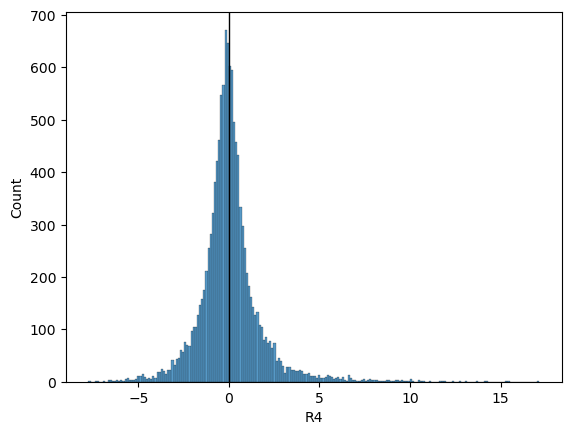

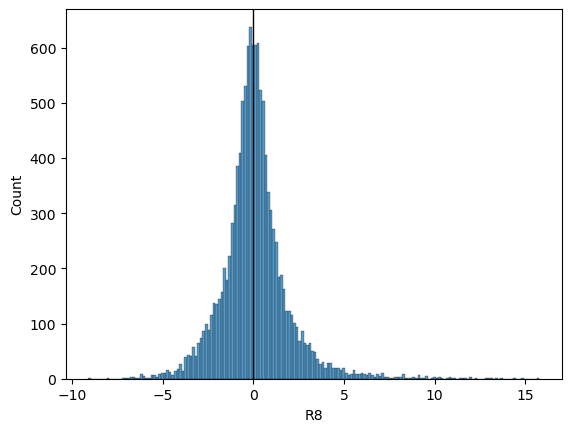

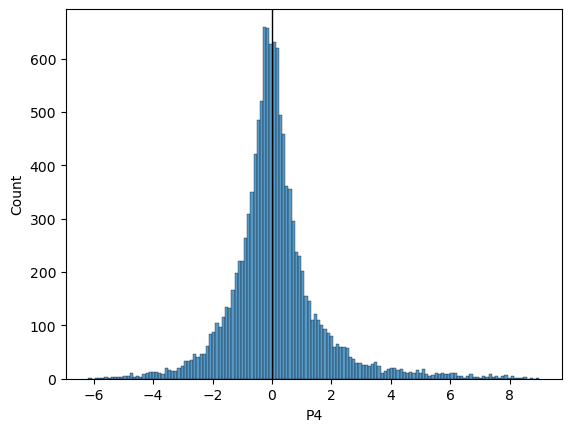

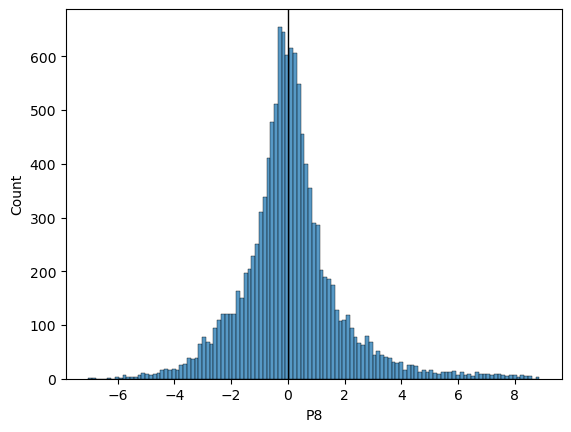

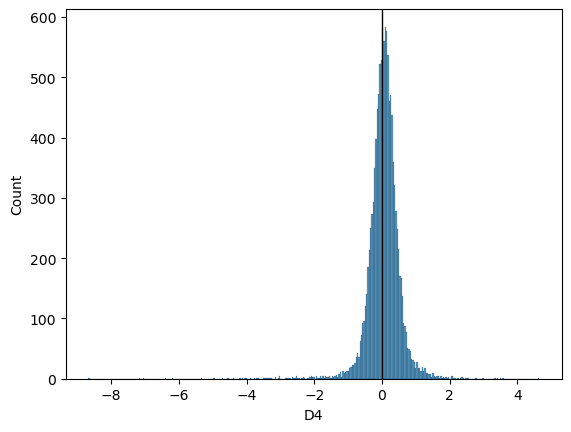

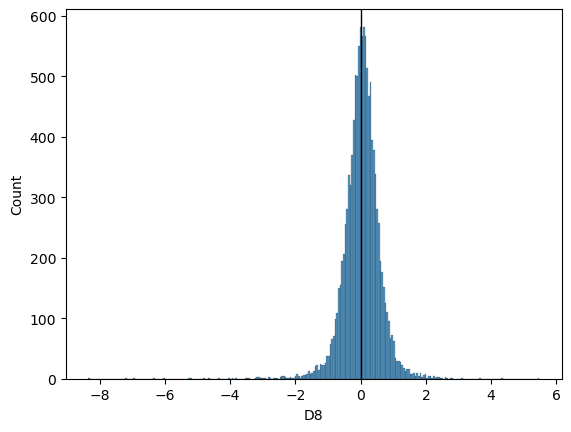

<Figure size 640x480 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot( RNA_avg_logFC["R4"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( RNA_avg_logFC["R8"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( RPF_avg_logFC["P4"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( RPF_avg_logFC["P8"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( RD_avg_logFC["D4"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( RD_avg_logFC["D8"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()